<a href="https://colab.research.google.com/github/shakshisinghai/Genetic_Algo_Projects/blob/master/Bottle_genetic_algo_Pixel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import random

In [ ]:

from google.colab import files
files.upload() 


Saving bottle.png to bottle.png


{'bottle.png': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x13\x12\x15\x13\x13\x12\x16\x15\x13\x17\x16\x1a\x18\x15\x15\x18\x18\x15\x18\x16\x15\x17\x1a\x15\x16\x17\x17\x15\x17\x18\x18\x1d( \x18\x1a%\x1b\x18\x18!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x05\x05\x05\x0e\x05\x05\x0e+\x19\x13\x19++++++++++++++++++++++++++++++++++++++++++++++++++\xff\xc0\x00\x11\x08\x00\xe0\x00\xe0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x07\x02\x06\x05\x03\x04\xff\xc4\x00F\x10\x00\x01\x02\x04\x03\x05\x06\x04\x02\x06\x07\t\x01\x01\x00\x00\x01\x00\x02\x11\x12!1\x03\x04A\x05"2a\x81\x07BQbq\xa1\x06\x91\xb2\xd1\x13\xf0\x14RTrt\xc1\x08\x15\x92\xa2\xa3\xb1\xd3#$%34\x82\x83\x93\xc2D\x16\xff\xc4\x00\x14\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xc4\x00\x14\x11\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xda\x00\x0

In [ ]:
!ls


bottle.png  sample_data


In [ ]:
#Changing colour of image to Gray scale
def to_gray(image):
  image = tf.image.rgb_to_grayscale(image)
  image= np.array(image).reshape(img_size, img_size,1)
  return image

(50, 50) (50,)


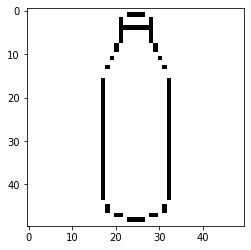

In [ ]:
img_size=50
pop_size=50
generations= 500
pxl=1
mutate_value=30
kill_rate=2
image = tf.image.decode_jpeg(tf.io.read_file('./bottle.png'))
image=tf.image.resize(image, [img_size, img_size])
image=to_gray(image)


image=image.reshape(img_size, img_size)
image= list(map(lambda img: list(map(lambda i: round((i/255)*pxl) , img)), image))
image=np.array(image)
print(image.shape, image[0].shape)
plt.imshow(image.reshape(img_size,img_size), cmap="gray")



In [ ]:
def generate_population(pop_size, img_size):
  pop=[]
  for s in range(pop_size):
    population=[]
    for i in range(img_size):
      for j in range(img_size):
        population.append(random.randint(0,pxl))
    population= np.array(population).reshape(img_size, img_size)
    pop=np.append(pop ,([0,population]))
  return pop

def fitness_func(img_member):
  #print("fitness start")
  global image
  img_member=img_member[1]
  #print(img_member.shape, image.shape)
  image=image.reshape(img_size, img_size)
  scorex, scorey=0,0
  for x in range(img_size):
    for y in range(img_size):
      #if x>(img_size/3) and x<(img_size/3+img_size/3)
      s=(pxl-abs(img_member[x][y]-image[x][y]))
      #print("score:",s, pxl, abs(img_member[x][y]-image[x][y]))
      scorex+=s
  #print("fitness end")
  return [(scorex), img_member]


def cross_breed(member1, member2):
  #print("cb start")
  member1=member1[1]
  member2=member2[1]
  split_index_x= random.randint(0, img_size-1)
  new_member1=np.append(member1[:,:split_index_x],member2[:, split_index_x : ],1)
  new_member2= np.append(member2[:,:split_index_x],member1 [:, split_index_x : ],1)
  return [[0,new_member1], [0,new_member2]]

def mutate(member):
  #print("mutate start")
  member=member[1]
  for i in range(mutate_value):
    mutate_index_x = random.randint(0,img_size-1)
    mutate_index_y = random.randint(0,img_size-1)
    value=random.randint(0,pxl)
    member[mutate_index_x][mutate_index_y]=value
  #print("mutate end")
  return [0,member]
        

<class 'numpy.ndarray'> (50, 2) (50, 50)
Generation  0
<class 'numpy.ndarray'> int64
<class 'numpy.ndarray'> int64
1303.0 1180.0
<class 'numpy.ndarray'> int64
Generation  1
<class 'numpy.ndarray'> int64
<class 'numpy.ndarray'> int64
1305.0 1219.0
<class 'numpy.ndarray'> int64
Generation  2
<class 'numpy.ndarray'> int64
<class 'numpy.ndarray'> int64
1308.0 1247.0
<class 'numpy.ndarray'> int64
Generation  3
<class 'numpy.ndarray'> int64
<class 'numpy.ndarray'> int64
1331.0 1257.0
<class 'numpy.ndarray'> int64
Generation  4
<class 'numpy.ndarray'> int64
<class 'numpy.ndarray'> int64
1331.0 1273.0
<class 'numpy.ndarray'> int64
Generation  5
<class 'numpy.ndarray'> int64
<class 'numpy.ndarray'> int64
1342.0 1284.0
<class 'numpy.ndarray'> int64
Generation  6
<class 'numpy.ndarray'> int64
<class 'numpy.ndarray'> int64
1344.0 1285.0
<class 'numpy.ndarray'> int64
Generation  7
<class 'numpy.ndarray'> int64
<class 'numpy.ndarray'> int64
1361.0 1309.0
<class 'numpy.ndarray'> int64
Generation  8
<

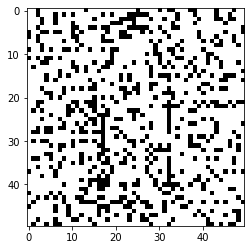

In [ ]:


population=generate_population(pop_size,img_size)
population=population.reshape(pop_size,2)
print(type(population),population.shape, population[1][1].shape)

maxscore, minscore=[],[]
#print(population)
for i in range(generations):
  j=0
  print("Generation ", i)
  print(type(population[0][1]), population[0][1].dtype)
  population=list(map(lambda ps: fitness_func(ps), population))
  population=(sorted(population, key=lambda a: a[0]))
  print(type(population[0][1]), population[0][1].dtype)
  maxscore.append(population[-1][0])
  minscore.append(population[0][0])
  #print("fit end")
  print(population[-1][0], population[0][0])
  population=population[pop_size//kill_rate:]
  popl=len(population)
  #print("cb start")
  while len(population)<pop_size:
    population.extend(cross_breed(population[random.randint(0,popl-1)], population[random.randint(0,popl-1)]))
  #print("cb end")
  print(type(population[0][1]), population[0][1].dtype)
  for i, member in enumerate(population):
    if (random.random()<0.5):
      population[i]=mutate(member)
  #print("m end")


plt.imshow(population[0][1], cmap="gray")


In [ ]:
population[0][1][4][5]=1

In [ ]:
print(maxscore, minscore)

[1303.0, 1305.0, 1308.0, 1331.0, 1331.0, 1342.0, 1344.0, 1361.0, 1381.0, 1380.0, 1386.0, 1386.0, 1388.0, 1390.0, 1396.0, 1396.0, 1399.0, 1402.0, 1413.0, 1413.0, 1414.0, 1413.0, 1421.0, 1426.0, 1429.0, 1433.0, 1434.0, 1433.0, 1433.0, 1437.0, 1437.0, 1441.0, 1442.0, 1448.0, 1448.0, 1449.0, 1451.0, 1459.0, 1458.0, 1459.0, 1471.0, 1471.0, 1473.0, 1479.0, 1479.0, 1478.0, 1478.0, 1483.0, 1487.0, 1485.0, 1492.0, 1496.0, 1498.0, 1502.0, 1503.0, 1509.0, 1515.0, 1517.0, 1516.0, 1515.0, 1524.0, 1524.0, 1528.0, 1531.0, 1537.0, 1537.0, 1537.0, 1540.0, 1544.0, 1545.0, 1546.0, 1546.0, 1551.0, 1549.0, 1555.0, 1563.0, 1563.0, 1563.0, 1563.0, 1563.0, 1567.0, 1570.0, 1571.0, 1571.0, 1571.0, 1572.0, 1575.0, 1574.0, 1577.0, 1584.0, 1581.0, 1583.0, 1582.0, 1585.0, 1588.0, 1589.0, 1592.0, 1592.0, 1597.0, 1597.0, 1601.0, 1600.0, 1600.0, 1609.0, 1609.0, 1616.0, 1616.0, 1621.0, 1622.0, 1621.0, 1621.0, 1626.0, 1626.0, 1629.0, 1625.0, 1627.0, 1625.0, 1629.0, 1630.0, 1630.0, 1631.0, 1633.0, 1633.0, 1638.0, 1643.0,

<class 'list'> (50, 50)


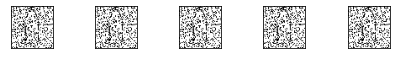

In [ ]:

n=5
j=1
rand=[random.randint(1,pop_size-1) for i in range(5)]
for i in rand:
  plt.subplot(n,n,j)
  plt.imshow(population[i][1], cmap="gray")
  plt.xticks([], [])
  plt.yticks([], [])
  j+=1

plt.tight_layout()

print(type(population), population[0][1].shape)
#plt.imshow(population[0][1])

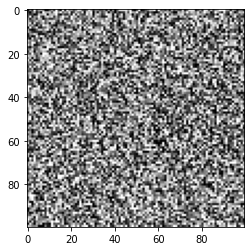

In [ ]:
 plt.imshow(population[0][1], cmap="gray")